# Get started with CTDYN

The CTDYN code uses a finite-difference approach to search the eigenvalues of the mean-field stellar dynamo problem corresponding to oscillating solutions. This tutorial is aimed at presenting a walkthrough of the main functionality of the `py_ctdyn` Python, which allows to altogether configure CTDYN inputs, run the Fortran executable, and analyse the outputs.

Before running this tutorial, you should check that you have compiled CTDYN and that the `$CTDYN_DIR$` environment variable exists.

### Running CTDYN

In [1]:
import py_ctdyn as dyn
dyn.__version__

'0.2'

Once the module is imported, we can set some input parameters that will be used to run CTDYN. This is done through a dictionary of dictionaries, each of them corresponding to one of the namelist expected by the Fortran code (e.g. `outputs` or `global`).

In [2]:
dir_out = "ctdyn_output"
ctdyn_param = {"outputs" : {"dir":"'{}'".format (dir_out)},
               }

The `run_ctdyn` function launches the CTDYN executable. A directory containing the CTDYN outputs is created. CTDYN standard outputs are redirected to `ctdyn.out` and error log to `ctdyn.err`.

In [3]:
dyn.run_ctdyn (ctdyn_param=ctdyn_param, verbose=True,
               rerun=False)

Running CTDYN with input file 'ctdyn_output/inlist_ctdyn'.


{'outputs': {'dir': "'ctdyn_output'"},
 'global': {},
 'grid': {},
 'profiles': {},
 'brent': {},
 'boundaries': {},
 'fields': {},
 'physics': {},
 'controls': {}}

### Analysing CTDYN results

The main parameters of the dynamo are summarised in a specific output file. The dynamo is parameterised by a set of adimensioned coefficients. $C_\alpha$ and $C_\Omega$, related to the $\alpha$-effect and the stellar rotation, respectively, have the following definition :

$C_\alpha = \alpha_0 R_\star / \eta_t$ ;

$C_\Omega = \Omega_\star R_\star^2 / \eta_t$ ; 

where $\alpha_0$ is the amplitude of the $\alpha$-effect, $\Omega_\star$ is the stellar rotation frequency, and $\eta_t$ is the turbulent diffusivity. 

Depending on the choice of input, the control parameter for the meridional circulation might depends on the $C_\Omega$, in the following way:

$C_{\rm meridional} = Re_0 + Re_1 C_\Omega^{x_m}$ ;

where the default value for $x_m$ is $x_m = -0.45$ (`xm` parameter from the `physics` namelist). The Reynolds number related to meridional circulation $Re$ can be computed as $v_{\rm meridional} R_\star / \eta_t$. $Re_0$ and $Re_1$ corresponds to the quantities `rm_i` and `rm_f` from the `controls` namelist. In practice, in CTDYN, $C_\Omega$ is directly passed as an input (`co` from the `controls` namelist), and $\eta_t$ is computed from the relation between the two quantities. 

Finally the adimensioned frequency of the cycle (`omega_cycle`), $\overline{\omega}$, is connected to its dimensioned counterpart, $\omega$, through 

$\overline{\omega} = \omega R_\star^2 / \eta_t$ . 

In [4]:
filename = "{}/critical_a0.dat".format (dir_out)
summary = dyn.read_summary_file (filename)
summary

C_alpha,C_omega,C_meridional,omega_cycle,period_cycle,eta,beta,Etor,Epol
float64,float64,float64,float64,float64,float64,float64,float64,float64
8.4583,1000.0,17.867,21.569,3.1912,14002000000000.0,0.0,0.0,0.0


In [5]:
filename = "{}/alpha.dat".format (dir_out)
df = dyn.read_radial_profiles (filename) 

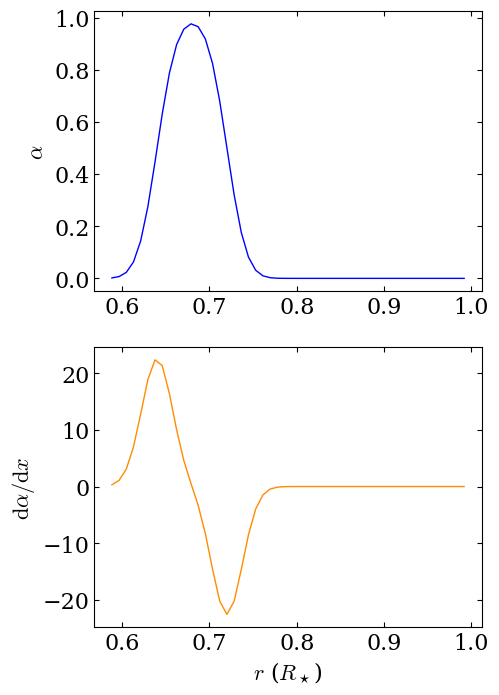

In [6]:
fig = dyn.plot_alpha (df)

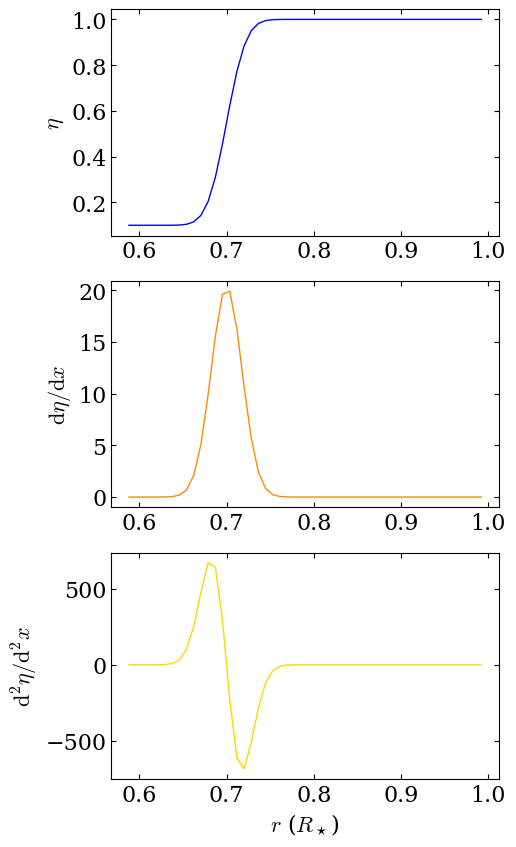

In [7]:
fig = dyn.plot_eta (df)

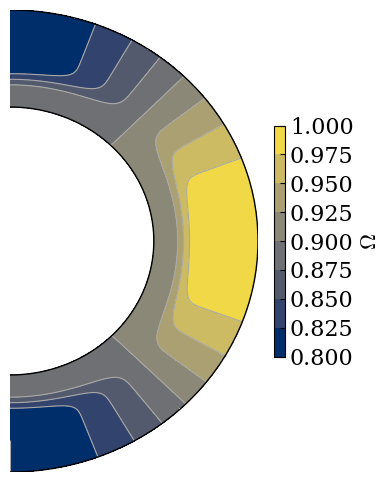

In [8]:
filename = "{}/omega.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"$\Omega$", 
                               cmap="cividis")

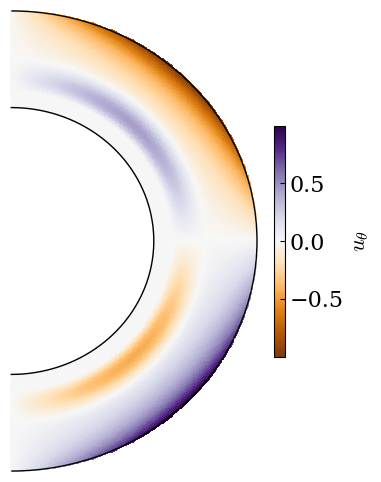

In [9]:
filename = "{}/utheta.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"$u_\theta$", cmap="PuOr", 
                               mode="pcolormesh", contour=False)

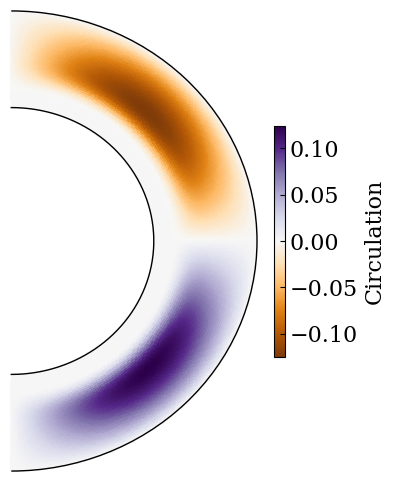

In [10]:
filename = "{}/stream.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"Circulation", cmap="PuOr", 
                               mode="pcolormesh", contour=False)

In [11]:
time = 2

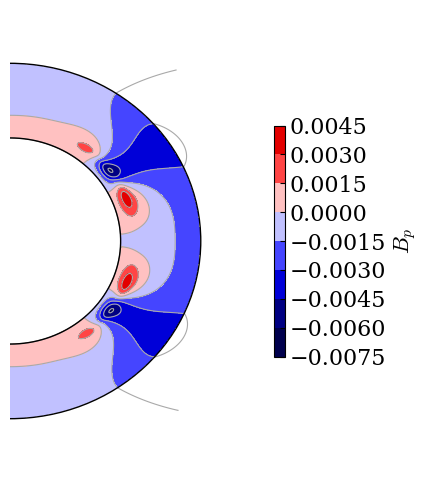

In [12]:
filename = "{}/pfld.{}.A00".format (dir_out, str (time).zfill (2))
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_p$",
                               mode="contourf")

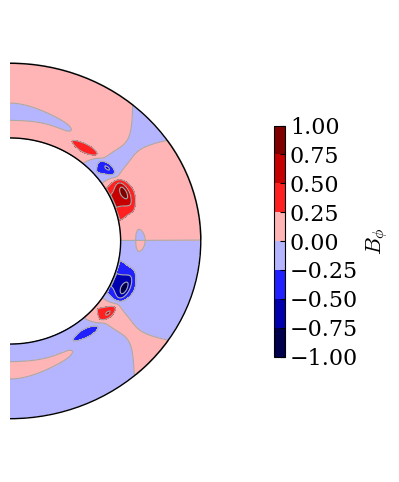

In [13]:
filename = "{}/tfld.{}.A00".format (dir_out, str (time).zfill (2))
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_\phi$")

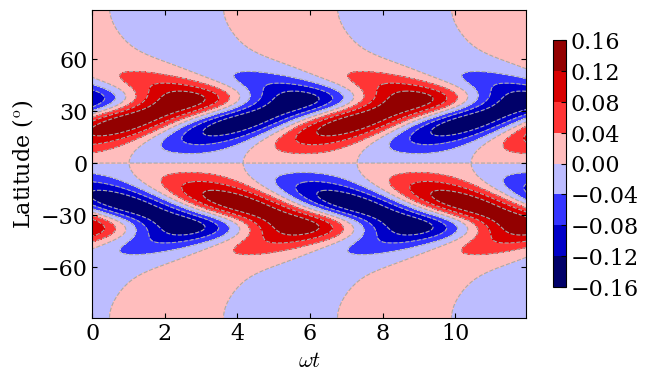

In [14]:
filename = "{}/butf.a00".format (dir_out)
t, theta, mesh = dyn.read_butterfly_diagram (filename)
fig = dyn.plot_butterfly_diagram (t, theta, mesh)

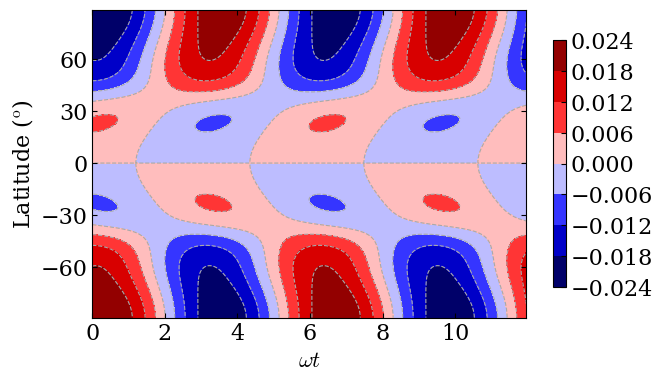

In [15]:
filename = "{}/brbp.a00".format (dir_out)
t, theta, mesh = dyn.read_butterfly_diagram (filename)
fig = dyn.plot_butterfly_diagram (t, theta, mesh)